# Import libraries

In [1]:
import sys
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

# Import modules

In [2]:
# Add path for module
# FIXME: shouldn't need this with a package install (`__init__` should suffice)
SCRIPT_DIR = Path().resolve().parent
sys.path.append(str(SCRIPT_DIR))

from PetersenEtAl2011 import run_displacement_profile

# Run profile

In [3]:
magnitude, percentile, submodel = 6.8, 0.5, "quadratic"

df = run_displacement_profile.run_profile(magnitude=magnitude, percentile=percentile, submodel=submodel)

df

,magnitude,location,style,percentile,model_name,mu,sigma,displ
0,6.8,0.00,strike-slip,0.5,quadratic,1.623480,1.1346,0.050707
1,6.8,0.05,strike-slip,0.5,quadratic,2.296529,1.1346,0.099396
2,6.8,0.10,strike-slip,0.5,quadratic,2.868717,1.1346,0.176144
3,6.8,0.15,strike-slip,0.5,quadratic,3.340043,1.1346,0.282203
4,6.8,0.20,strike-slip,0.5,quadratic,3.710508,1.1346,0.408746
5,6.8,0.25,strike-slip,0.5,quadratic,3.980111,1.1346,0.535230
6,6.8,0.30,strike-slip,0.5,quadratic,4.148853,1.1346,0.633613
7,6.8,0.35,strike-slip,0.5,quadratic,4.216733,1.1346,0.678116
8,6.8,0.40,strike-slip,0.5,quadratic,4.183752,1.1346,0.656116
9,6.8,0.45,strike-slip,0.5,quadratic,4.049909,1.1346,0.573922


In [4]:
magnitude, percentile, step_size = 6.8, 0.5, 0.01

df = run_displacement_profile.run_profile(magnitude=magnitude, percentile=percentile, location_step=step_size)

df

,magnitude,location,style,percentile,model_name,mu,sigma,displ
0,6.8,0.00,strike-slip,0.5,elliptical,0.971160,1.1348,0.026410
1,6.8,0.01,strike-slip,0.5,elliptical,1.628668,1.1348,0.050971
2,6.8,0.02,strike-slip,0.5,elliptical,1.896308,1.1348,0.066613
3,6.8,0.03,strike-slip,0.5,elliptical,2.098434,1.1348,0.081534
4,6.8,0.04,strike-slip,0.5,elliptical,2.266097,1.1348,0.096417
...,...,...,...,...,...,...,...,...
96,6.8,0.96,strike-slip,0.5,elliptical,2.266097,1.1348,0.096417
97,6.8,0.97,strike-slip,0.5,elliptical,2.098434,1.1348,0.081534
98,6.8,0.98,strike-slip,0.5,elliptical,1.896308,1.1348,0.066613
99,6.8,0.99,strike-slip,0.5,elliptical,1.628668,1.1348,0.050971


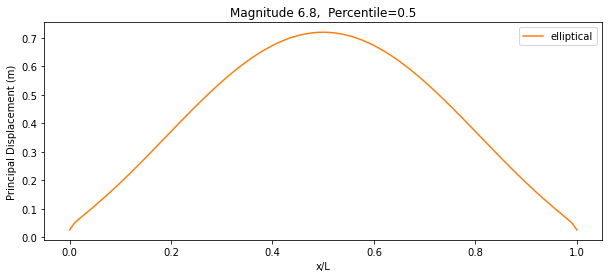

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
x, y = df["location"], df["displ"]
ax.plot(x, y, c="tab:orange", label=df["model_name"].iloc[0])
title = f"Magnitude {magnitude},  Percentile={percentile}"
ax.set(xlabel="x/L", ylabel="Principal Displacement (m)", title=title)
ax.legend(loc="best")